11. Diese Aufgabe befasst sich mit dem Datensatz DirectMail.jmp. Bearbeiten Sie die Aufgabe sowohl in JMP als auch mit Python. Über 19 Wochen wurden in einem Geschäft zwei Variablen erhoben:
- Sales Weekly (Tuesday through Sunday): total revenues in $ 1.000
- Direct Mail: weekly direct mail costs, including supplies and postage, in dollars

In [54]:
import os, sys
PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(PROJECT_ROOT)

In [55]:
import pandas as pd
import seaborn as sns
from utils import *
import matplotlib.pyplot as plt

In [56]:
sns.set(style="whitegrid")
pd.set_option('display.max_columns', 100)
healthy_orange = '#EC6602'
healthy_orange_50 = '#F9B591'
healthy_orange_25 = '#FDDDCB'
siemens_petrol = '#009999'
siemens_petrol_50 = '#87D2D2'
sns.set_palette([healthy_orange, siemens_petrol, healthy_orange_50, healthy_orange_25, siemens_petrol_50])
RANDOM_SEED = 42

In [57]:
df = pd.read_csv('../data/DirectMail.txt')
df.head()

,Week,Sales,Direct Mail
0,1,12.123,98
1,2,21.209,212
2,3,9.998,561
3,4,42.978,413
4,5,49.637,267


In [58]:
column_names = {'Week': 'week',
                'Sales': 'sales',
                'Direct Mail': 'direct_mail'}

In [59]:
df = df.rename(columns=column_names)

a) Führen Sie für alle Variablen im Datensatz eine explorative Datenanalyse durch.

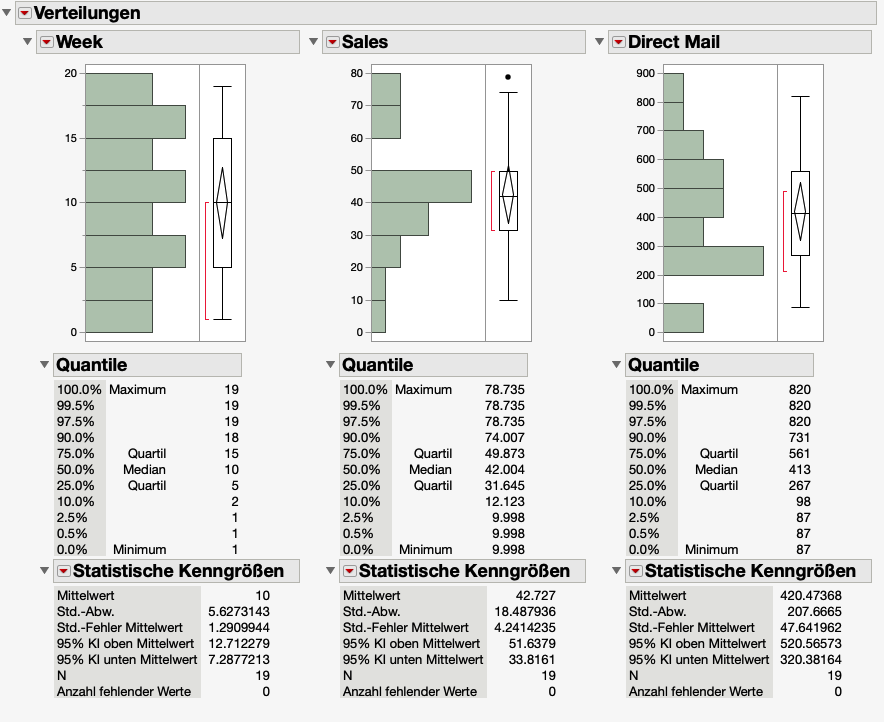

In [60]:
df.describe()

,week,sales,direct_mail
count,19.000000,19.000000,19.000000
mean,10.000000,42.727000,420.473684
std,5.627314,18.487936,207.666498
min,1.000000,9.998000,87.000000
25%,5.500000,31.703500,273.000000
50%,10.000000,42.004000,413.000000
75%,14.500000,49.755000,552.500000
max,19.000000,78.735000,820.000000


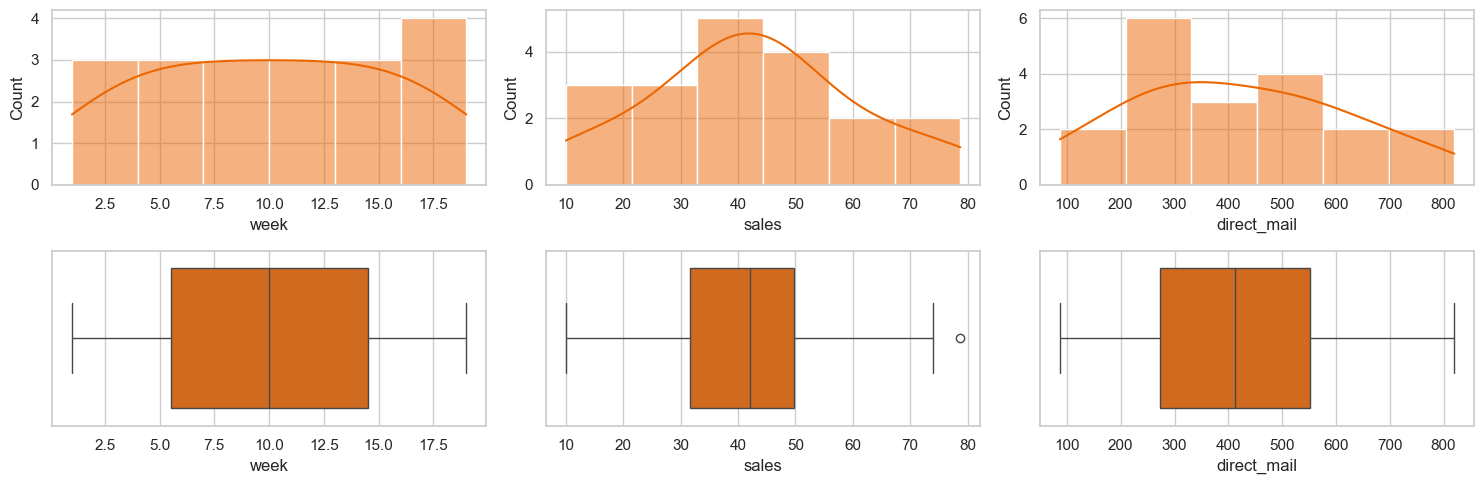

In [61]:
fig, axes = plt.subplots(2, 3, figsize=(15, 5))

for i, col in enumerate(df.columns):
    sns.histplot(df[col], ax=axes[0, i], kde=True)
    sns.boxplot(x=df[col], ax=axes[1, i])

plt.tight_layout()
plt.show()

b) Führen Sie eine einfache lineare Regression von Direct Mail und Sales durch.

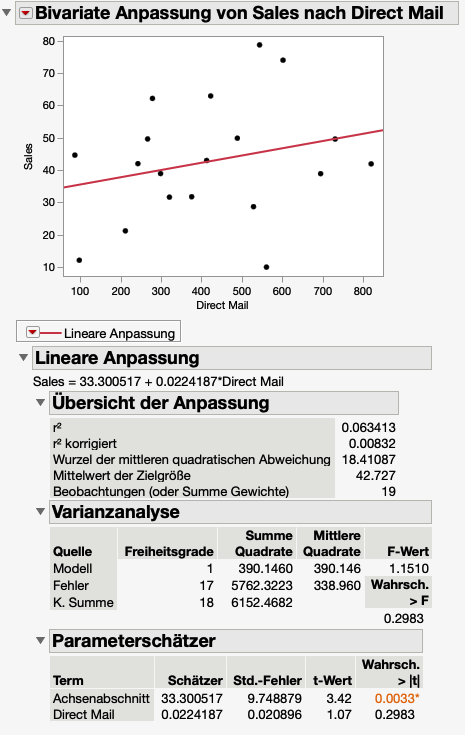

In [62]:
import statsmodels.api as sm
X = df.direct_mail
X = sm.add_constant(X)
y = df.sales
model = sm.OLS(y, X)
results = model.fit()
results.summary()

/Users/omer/miniforge3/envs/statistics/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=19 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.151
Date:                Wed, 26 Mar 2025   Prob (F-statistic):              0.298
Time:                        18:53:53   Log-Likelihood:                -81.249
No. Observations:                  19   AIC:                             166.5
Df Residuals:                      17   BIC:                             168.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          33.3005      9.749      3.416      0.003      12.732      53.869
direct_mail     0.0224      0.021      1.073      0.298      -0.022       0.067
==============================================================================
Omnibus:                        0.030   Durbin-Watson:                   1.656
Prob(Omnibus):                  0.985   Jarque-Bera (JB):                0.217
Skew:                           0.070   Prob(JB):                        0.897
Kurtosis:                       2.495   Cond. No.                     1.08e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

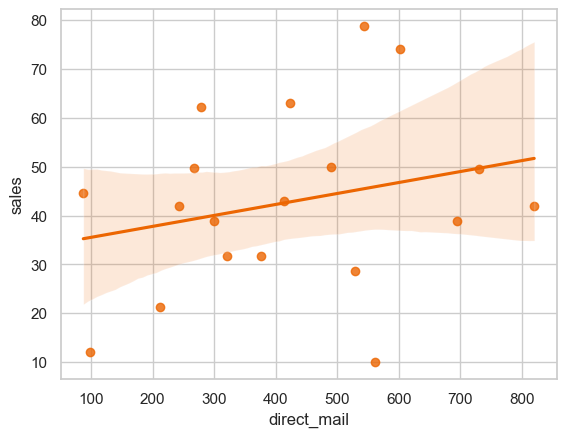

In [63]:
sns.regplot(x='direct_mail', y='sales', data=df);

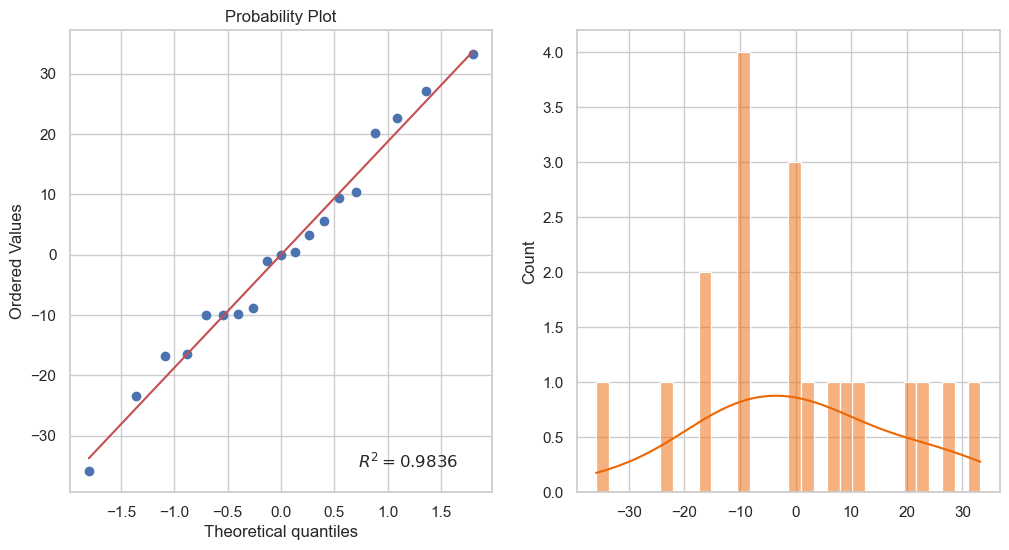

Shapiro-Wilk normality test: p-value = 0.9657799002202929
D'Agostino's K^2 normality test: p-value = 0.9852207396625772
Kolmogorov-Smirnov normality test: p-value = 0.954116995231012
Anderson-Darling normality test: statistic = 0.1873262149255055, critical value = 0.69


/Users/omer/miniforge3/envs/statistics/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=19 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [64]:
check_normality(results.resid)

c) Erzeugen Sie eine neue Variable Direct Mail Lag1, indem Sie die Daten um eine Woche nach hinten verschieben. Wiederholen Sie die lineare Regression mit der neuen Variablen.

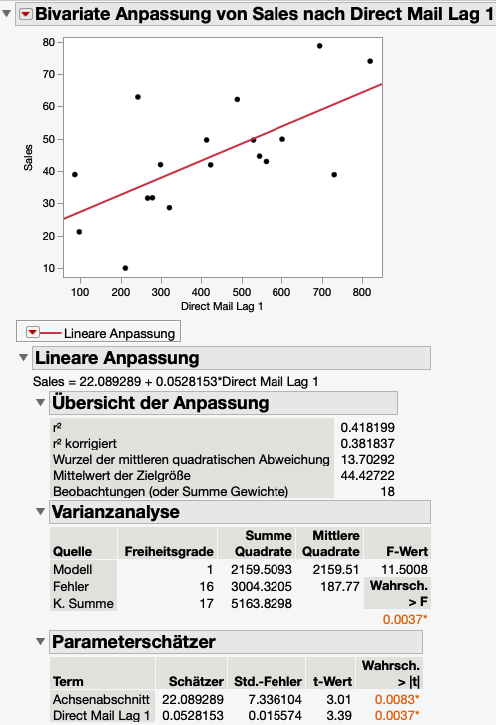

In [65]:
df['direct_mail_lag1'] = df.direct_mail.shift(1)

In [66]:
df

,week,sales,direct_mail,direct_mail_lag1
0,1,12.123,98,NaN
1,2,21.209,212,98.0
2,3,9.998,561,212.0
3,4,42.978,413,561.0
4,5,49.637,267,413.0
5,6,31.645,321,267.0
6,7,28.698,529,321.0
7,8,49.611,731,529.0
8,9,38.908,695,731.0
9,10,78.735,544,695.0


In [67]:
import statsmodels.api as sm
X = df.dropna().direct_mail_lag1
X = sm.add_constant(X)
y = df.dropna().sales
model = sm.OLS(y, X)
results_lag1 = model.fit()
results_lag1.summary()

/Users/omer/miniforge3/envs/statistics/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     11.50
Date:                Wed, 26 Mar 2025   Prob (F-statistic):            0.00373
Time:                        18:53:54   Log-Likelihood:                -71.598
No. Observations:                  18   AIC:                             147.2
Df Residuals:                      16   BIC:                             149.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               22.0893      7.336      3.011      0.008       6.537      37.641
direct_mail_lag1     0.0528      0.016      3.391      0.004       0.020       0.086
==============================================================================
Omnibus:                        0.426   Durbin-Watson:                   2.242
Prob(Omnibus):                  0.808   Jarque-Bera (JB):                0.243
Skew:                           0.259   Prob(JB):                        0.886
Kurtosis:                       2.764   Cond. No.                     1.07e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

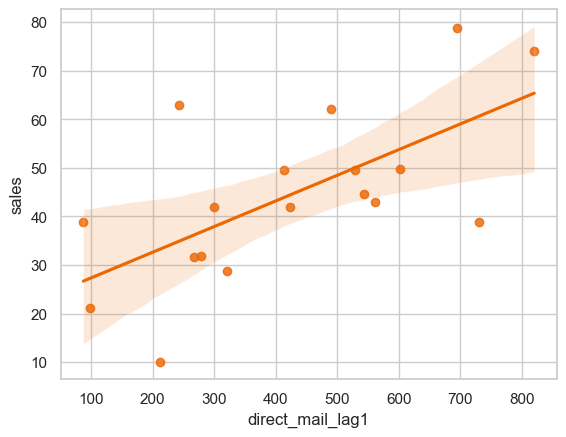

In [68]:
sns.regplot(x='direct_mail_lag1', y='sales', data=df.dropna());

d) Erzeugen Sie eine neue Variable Direct Mail Lag2, indem Sie die Daten um zwei Wochen nach hinten verschieben. Wiederholen Sie die lineare Regression mit der neuen Variablen.

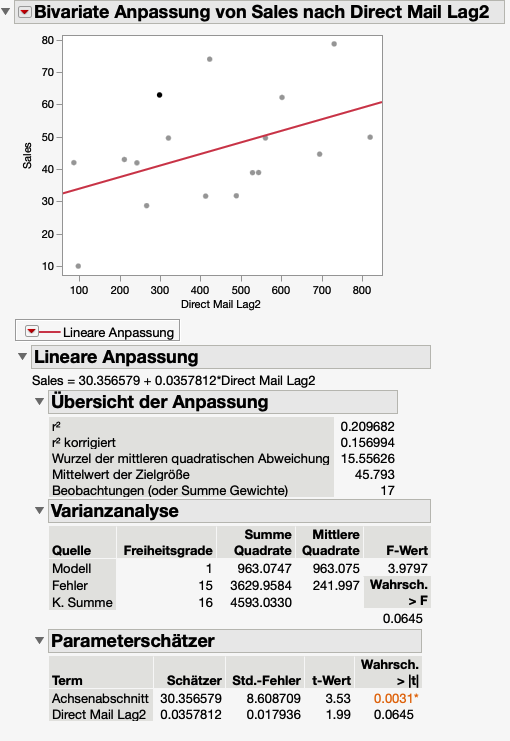

In [69]:
df['direct_mail_lag2'] = df.direct_mail.shift(2)
df

,week,sales,direct_mail,direct_mail_lag1,direct_mail_lag2
0,1,12.123,98,NaN,NaN
1,2,21.209,212,98.0,NaN
2,3,9.998,561,212.0,98.0
3,4,42.978,413,561.0,212.0
4,5,49.637,267,413.0,561.0
5,6,31.645,321,267.0,413.0
6,7,28.698,529,321.0,267.0
7,8,49.611,731,529.0,321.0
8,9,38.908,695,731.0,529.0
9,10,78.735,544,695.0,731.0


In [70]:
import statsmodels.api as sm
X = df.dropna().direct_mail_lag2
X = sm.add_constant(X)
y = df.dropna().sales
model = sm.OLS(y, X)
results_lag2 = model.fit()
results_lag2.summary()

/Users/omer/miniforge3/envs/statistics/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     3.980
Date:                Wed, 26 Mar 2025   Prob (F-statistic):             0.0645
Time:                        18:53:54   Log-Likelihood:                -69.714
No. Observations:                  17   AIC:                             143.4
Df Residuals:                      15   BIC:                             145.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               30.3566      8.609      3.526      0.003      12.008      48.706
direct_mail_lag2     0.0358      0.018      1.995      0.065      -0.002       0.074
==============================================================================
Omnibus:                        1.169   Durbin-Watson:                   2.206
Prob(Omnibus):                  0.557   Jarque-Bera (JB):                0.985
Skew:                           0.392   Prob(JB):                        0.611
Kurtosis:                       2.120   Cond. No.                     1.10e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

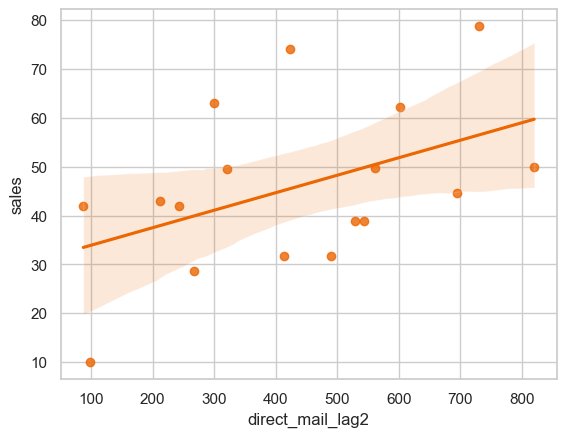

In [71]:
sns.regplot(x='direct_mail_lag2', y='sales', data=df.dropna());

e) Vergleichen Sie die drei linearen Regressionen anhand geeigneter Kennzahlen. Welche inhaltliche Schlussfolgerung erhalten Sie?

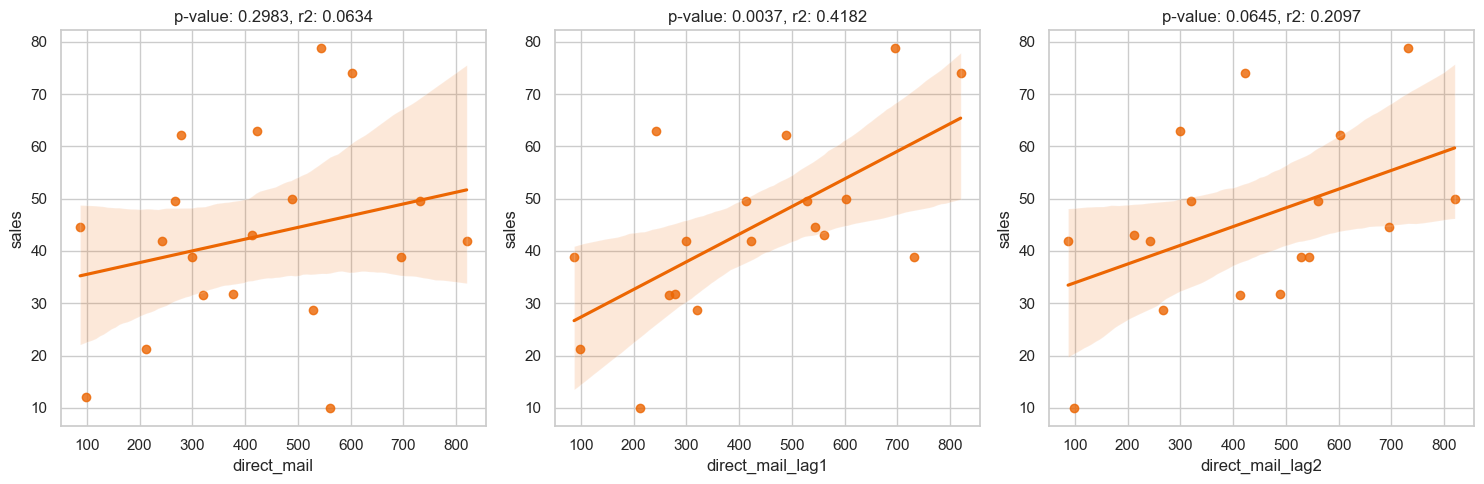

In [74]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.regplot(x='direct_mail', y='sales', data=df, ax=axes[0])
axes[0].set_title(f'p-value: {results.pvalues[1]:.4f}, r2: {results.rsquared:.4f}')
sns.regplot(x='direct_mail_lag1', y='sales', data=df.dropna(subset='direct_mail_lag1'), ax=axes[1])
axes[1].set_title(f'p-value: {results_lag1.pvalues[1]:.4f}, r2: {results_lag1.rsquared:.4f}')
sns.regplot(x='direct_mail_lag2', y='sales', data=df.dropna(subset='direct_mail_lag2'), ax=axes[2])
axes[2].set_title(f'p-value: {results_lag2.pvalues[1]:.4f}, r2: {results_lag2.rsquared:.4f}')
plt.tight_layout()
plt.show()

Auswertung: Das zweite Modell ist besser als den anderen Beiden, weil wir da für unseren Prädiktor einen signifikanten P-Wert haben (<0.05) und r2 ist auch gut. Das schlimmiste Modell ist das erste. Ich glaube das zeigt, das unsere Ausgaben einen deutlichen Effekt an Sales haben aber nicht für die gleiche Woche sondern für die nächste Woche, was auch Sinn ergibt, weil Marketing oft den Effekt erst danach hat und nicht sofort. Aber wie viel Zeit danach ist schwierig zu sagen, in diesem Fall anscheinend eine Woche ist eine gute Approximation, da zwei Wochen hat unseres Ergebnis verschlechtert.